In [1]:
import random
import pandas as pd
import numpy as np

In [2]:
#Importing dataset
df = pd.read_csv('final_dataset.csv')
df.head()

,TEMPERATURE,RAINFALL(cm),HUMIDITY(%),SOIL,Target
0,17.37,97.87,54.54,alluvial,0
1,25.46,170.65,56.47,alluvial,3
2,26.83,208.49,69.81,loamy,2
3,24.57,139.99,60.01,alluvial,3
4,24.26,61.90,53.81,clay,1


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
# Label encoding the Soil
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X['SOIL'] = labelencoder.fit_transform(X['SOIL'])

In [5]:
# One hot encoding the dependent and independent variables.
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [3])
onehotencoder2 = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
y = np.array(y).reshape(-1, 1)
y = onehotencoder2.fit_transform(y).toarray()

c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
c:\users\sahaj oberoi\appdata\local\programs

In [6]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Necessary imports for Deep Learning
from keras import models
from keras.models import Model
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [8]:
# Layers of Deep Learning
model = models.Sequential()
model.add(Dense(16,activation='relu', input_dim=7))
model.add(Dense(16,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))

W1014 19:57:18.638908  9440 deprecation_wrapper.py:119] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1014 19:57:18.670812  9440 deprecation_wrapper.py:119] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1014 19:57:18.676118  9440 deprecation_wrapper.py:119] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
Total params: 744
Trainable params: 744
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W1014 19:57:18.835263  9440 deprecation_wrapper.py:119] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1014 19:57:18.886543  9440 deprecation_wrapper.py:119] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
history = model.fit(X_train, y_train, epochs=45, batch_size=10)

W1014 19:57:19.084607  9440 deprecation.py:323] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1014 19:57:19.208185  9440 deprecation_wrapper.py:119] From c:\users\sahaj oberoi\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/45
280/280 [==============================] - 1s 2ms/step - loss: 3.3385 - acc: 0.3714
Epoch 2/45
280/280 [==============================] - 0s 211us/step - loss: 1.6458 - acc: 0.4786
Epoch 3/45
280/280 [==============================] - 0s 234us/step - loss: 0.9283 - acc: 0.5929
Epoch 4/45
280/280 [==============================] - 0s 237us/step - loss: 0.7774 - acc: 0.5786
Epoch 5/45
280/280 [==============================] - 0s 224us/step - loss: 0.7131 - acc: 0.6821
Epoch 6/45
280/280 [==============================] - 0s 235us/step - loss: 0.6849 - acc: 0.7071
Epoch 7/45
280/280 [==============================] - 0s 229us/step - loss: 0.6414 - acc: 0.7393
Epoch 8/45
280/280 [==============================] - 0s 220us/step - loss: 0.6312 - acc: 0.7143
Epoch 9/45
280/280 [==============================] - 0s 216us/step - loss: 0.5804 - acc: 0.7643
Epoch 10/45
280/280 [==============================] - 0s 231us/step - loss: 0.5724 - acc: 0.7464
Epoch 11/45
280/280 [==========

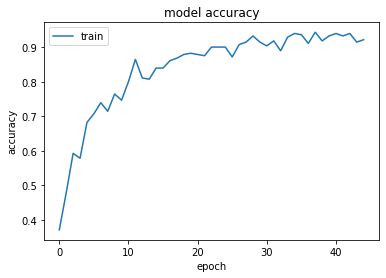

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
